<a href="https://colab.research.google.com/github/MammadovN/Machine_Learning/blob/main/projects/02_unsupervised/anomaly_detection/fraud_detection/Anomaly_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# -*- coding: utf-8 -*-
"""
Unsupervised Anomaly Detection Project
"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix

In [9]:
import numpy as np
import pandas as pd

# 1. Data Loading and Exploration
def load_data():
    np.random.seed(42)

    # Normal data
    normal_data = np.random.normal(loc=0, scale=1, size=(1000, 5))

    # Anomalies (5% of the data)
    anomalies = np.random.uniform(low=-4, high=4, size=(50, 5))

    # Combine them
    data = np.vstack([normal_data, anomalies])
    labels = np.array([0]*1000 + [1]*50)  # 0: normal, 1: anomaly

    # Create DataFrame
    columns = [f'Feature_{i}' for i in range(1, 6)]
    df = pd.DataFrame(data, columns=columns)
    df['Label'] = labels

    return df

In [11]:
# 2. Data Preprocessing
def preprocess_data(df):
    # Separate labels
    labels = df['Label']
    features = df.drop('Label', axis=1)

    # Scaling
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features)

    return scaled_features, labels, features

In [12]:
# 3. Anomaly Detection Algorithms
def apply_anomaly_detection(X):
    models = {
        'Isolation Forest': IsolationForest(contamination=0.05, random_state=42),
        'Local Outlier Factor': LocalOutlierFactor(n_neighbors=20, contamination=0.05),
        'One-Class SVM': OneClassSVM(nu=0.05, kernel='rbf', gamma=0.1)
    }

    results = {}
    for name, model in models.items():
        # Apply the model
        if name == 'Local Outlier Factor':
            preds = model.fit_predict(X)
        else:
            model.fit(X)
            preds = model.predict(X)

        # LOF and Isolation Forest return -1 (outlier) and 1 (inlier)
        # Our labels are 1 (anomaly) and 0 (normal)
        preds = np.where(preds == -1, 1, 0)

        results[name] = preds

    return results

In [6]:
# 4. Evaluate Results
def evaluate_results(y_true, results):
    for name, preds in results.items():
        print(f"\n{name} Performance:")
        print(classification_report(y_true, preds))

        # Confusion matrix
        cm = confusion_matrix(y_true, preds)
        plt.figure(figsize=(4, 4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=['Normal', 'Anomaly'],
                    yticklabels=['Normal', 'Anomaly'])
        plt.title(f'{name} - Confusion Matrix')
        plt.show()

In [15]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# 5. Visualization
def visualize_results(X, y_true, results, original_features):
    # Dimensionality reduction using PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    # Visualization for all models
    plt.figure(figsize=(20, 15))

    # True labels
    plt.subplot(2, 2, 1)
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_true,
                    palette={0: 'blue', 1: 'red'}, alpha=0.6)
    plt.title('True Data Distribution')

    # Predictions from models
    for i, (name, preds) in enumerate(results.items(), 2):
        plt.subplot(2, 2, i)
        sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=preds,
                        palette={0: 'blue', 1: 'red'}, alpha=0.6)
        plt.title(f'{name} Predictions')

    plt.tight_layout()
    plt.show()

    # Feature distributions
    original_features['Label'] = y_true
    for col in original_features.columns[:-1]:
        plt.figure(figsize=(8, 5))
        sns.boxplot(x='Label', y=col, data=original_features)
        plt.title(f'{col} Distribution - Normal vs Anomaly')
        plt.show()

Loading data...

Data Preview:


,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Label
0,0.496714,-0.138264,0.647689,1.523030,-0.234153,0
1,-0.234137,1.579213,0.767435,-0.469474,0.542560,0
2,-0.463418,-0.465730,0.241962,-1.913280,-1.724918,0
3,-0.562288,-1.012831,0.314247,-0.908024,-1.412304,0
4,1.465649,-0.225776,0.067528,-1.424748,-0.544383,0



Preprocessing data...

Running anomaly detection algorithms...

Evaluating model performance...

Isolation Forest Performansı:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1000
           1       0.83      0.88      0.85        50

    accuracy                           0.99      1050
   macro avg       0.91      0.94      0.92      1050
weighted avg       0.99      0.99      0.99      1050



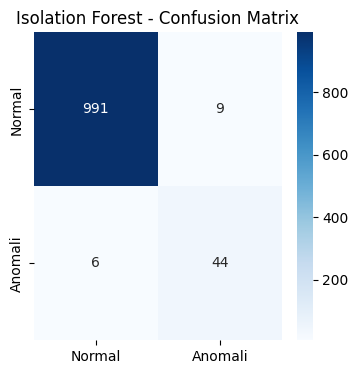


Local Outlier Factor Performansı:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1000
           1       0.85      0.90      0.87        50

    accuracy                           0.99      1050
   macro avg       0.92      0.95      0.93      1050
weighted avg       0.99      0.99      0.99      1050



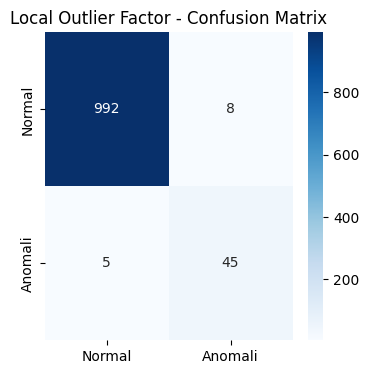


One-Class SVM Performansı:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1000
           1       0.81      0.86      0.83        50

    accuracy                           0.98      1050
   macro avg       0.90      0.93      0.91      1050
weighted avg       0.98      0.98      0.98      1050



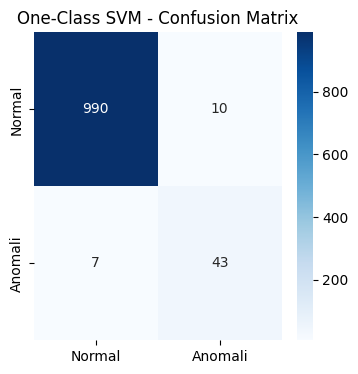


Visualizing results...


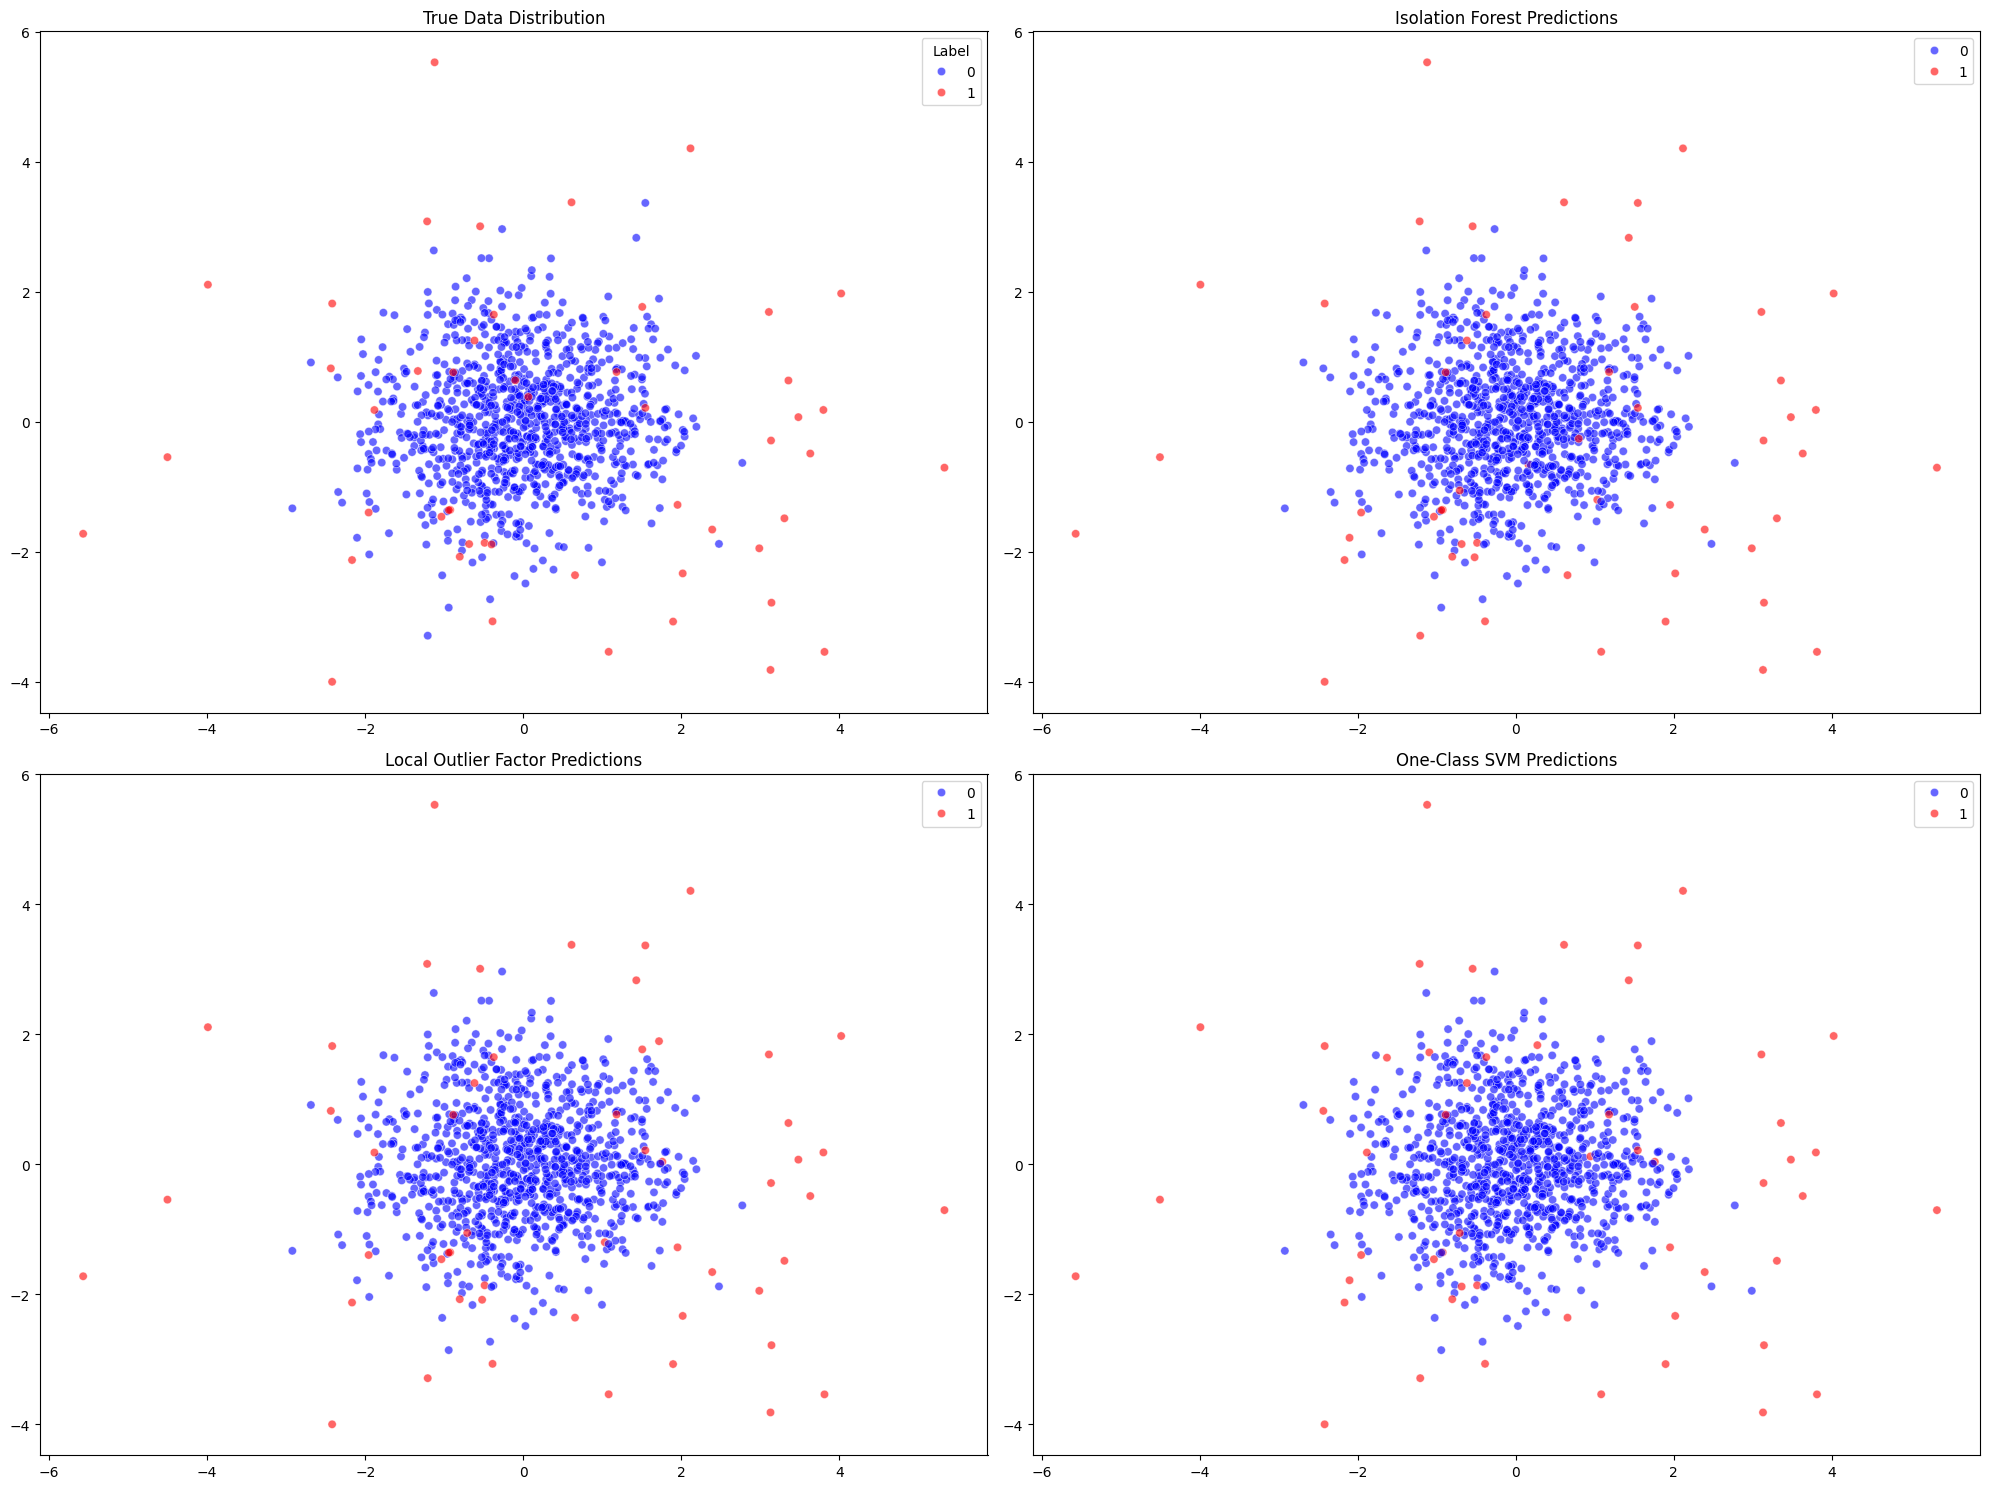

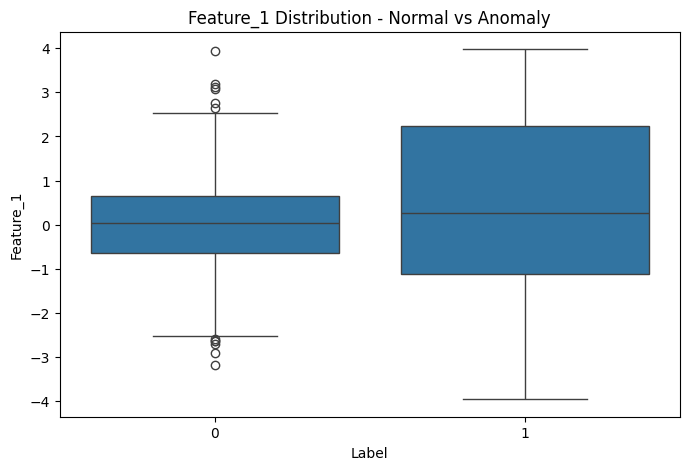

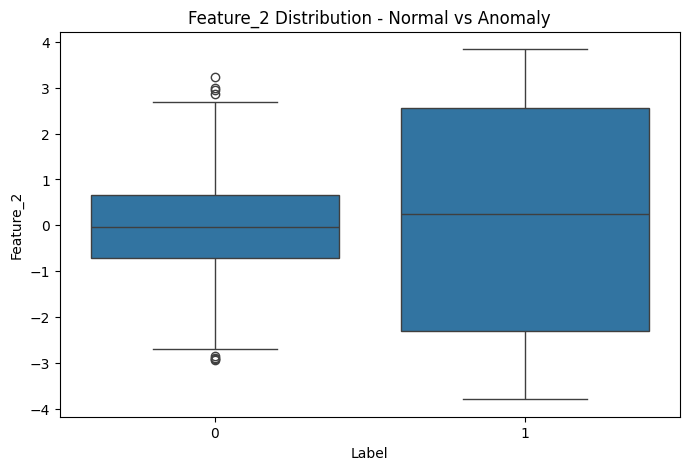

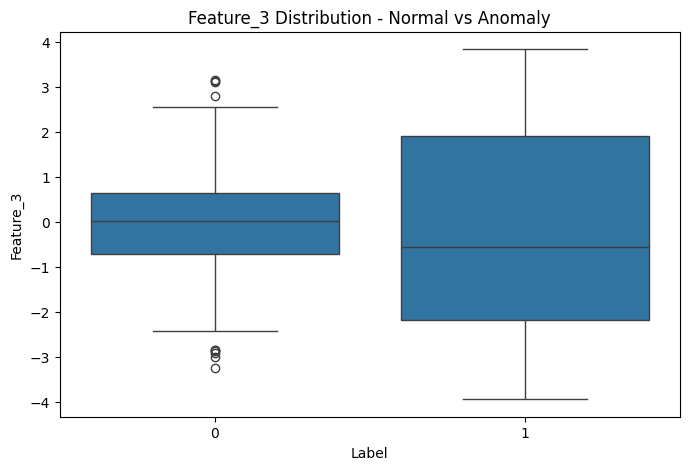

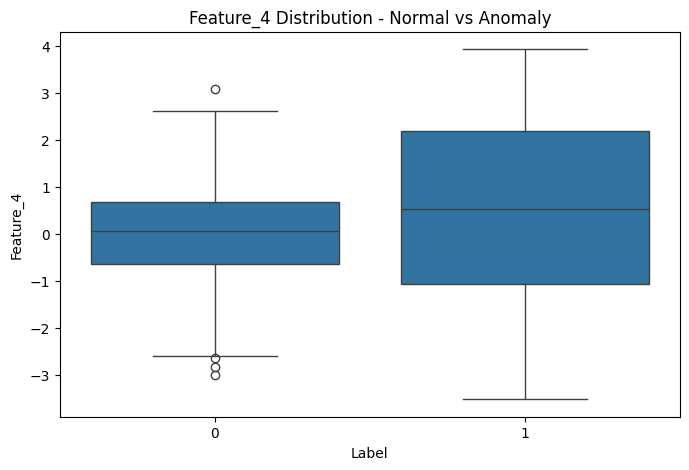

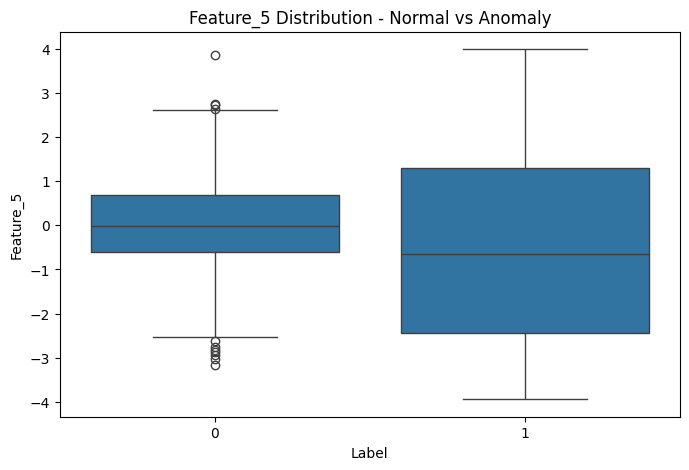

In [16]:
# 6. Main Function
def main():
    # Load data
    print("Loading data...")
    df = load_data()
    print("\nData Preview:")
    display(df.head())

    # Preprocess data
    print("\nPreprocessing data...")
    X, y, original_features = preprocess_data(df)

    # Apply anomaly detection algorithms
    print("\nRunning anomaly detection algorithms...")
    results = apply_anomaly_detection(X)

    # Evaluate results
    print("\nEvaluating model performance...")
    evaluate_results(y, results)

    # Visualize results
    print("\nVisualizing results...")
    visualize_results(X, y, results, original_features)

if __name__ == "__main__":
    main()